# __PCA__

#### __PCA stands for Principal Component Analysis, a statistical technique used to simplify complex datasets by reducing the number of variables while retaining most of the important information.__

This process helps in:

- __Dimensionality reduction:__ Reducing high-dimensional data (many variables) into fewer dimensions, making it easier to manage and analyze.
- __Data visualization:__ Allowing complex, multidimensional data to be plotted in 2D or 3D graphs to reveal patterns, trends, and outliers.
- __Noise reduction:__ Focusing on components with high variance (signal) and discarding those with low variance (noise).
- __Improving machine learning models:__ Speeding up algorithms and helping to prevent overfitting by providing a more compact and relevant set of features

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## __1. Data Gathering__

In [2]:
dir(load_digits())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
data = load_digits()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

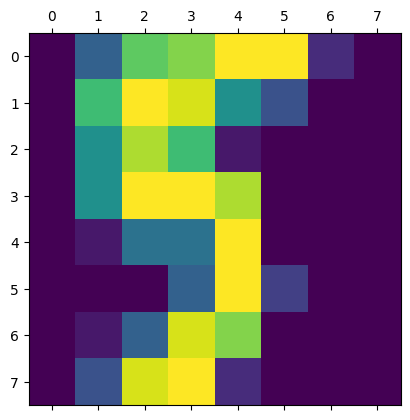

In [5]:
plt.matshow(data.images[15])

## __2 EDA/Scaling__

In [6]:
scaler = StandardScaler()
scaled_x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
scaled_x.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008


## __3 Model Training__

In [7]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=25, stratify=y)

- __Without PCA__

In [8]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
knn_model.n_features_in_

64

In [10]:
train_acc = knn_model.score(x_train, y_train)
test_acc = knn_model.score(x_test, y_test)
train_acc, test_acc

(0.9867780097425192, 0.9722222222222222)

In [11]:
col_name = [f"PCA-{i}" for i in range(x.columns.shape[0])]

- __With PCA__

- _Training PCA_

In [12]:
pca = PCA()
x_train_pca = pd.DataFrame(pca.fit_transform(x_train), columns=col_name)
x_train_pca.head(3)

,PCA-0,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,...,PCA-54,PCA-55,PCA-56,PCA-57,PCA-58,PCA-59,PCA-60,PCA-61,PCA-62,PCA-63
0,0.601369,1.595359,-3.347282,-0.114225,-0.119414,-0.620298,-0.052738,0.133956,-0.211219,-0.135214,...,-0.054063,-0.029235,-0.119240,-0.697074,-0.069841,-0.051920,-0.366035,-1.364252e-16,0.0,2.494119e-16
1,-0.579502,-4.896811,0.193435,-0.473536,1.917926,-0.716792,-1.068861,-2.474896,-0.009999,1.412795,...,-0.110193,-0.072328,-0.065055,0.136395,-0.258524,0.030182,-0.075577,4.091951e-16,0.0,9.728395e-16
2,-2.060557,-4.625308,0.021216,-1.485033,-0.027755,0.085216,-0.036805,-1.677585,-0.399745,0.139814,...,-0.010583,-0.384367,0.391503,-0.030781,-0.503506,-0.134391,-0.156454,2.107498e-16,0.0,-6.399640e-16


In [13]:
knn_model_pca = KNeighborsClassifier()
knn_model_pca.fit(x_train_pca, y_train)

KNeighborsClassifier()

- _Training Accuracy_

In [14]:
train_acc_pca = knn_model_pca.score(x_train_pca, y_train)
train_acc_pca

0.9867780097425192

- _Testing PCA | Transforming test data_

In [15]:
x_test_pca = pd.DataFrame(pca.transform(x_test), columns=col_name)
train_acc_pca = knn_model_pca.score(x_train_pca, y_train)

- _Testing Accuracy_

In [16]:
test_acc_pca = knn_model_pca.score(x_test_pca, y_test)
test_acc_pca

0.9722222222222222

In [17]:
train_acc_pca, test_acc_pca

(0.9867780097425192, 0.9722222222222222)

# __4. Finding Best PCA__

In [18]:
best_train_acc, best_test_acc = [], []
for i in range(1, x.columns.shape[0]+1):
    model = KNeighborsClassifier(n_neighbors=5)

    # Train only on TRAIN PCA features
    model.fit(x_train_pca.iloc[:, :i], y_train)

    # Evaluate
    train_acc = model.score(x_train_pca.iloc[:, :i], y_train)
    test_acc = model.score(x_test_pca.iloc[:, :i], y_test)

    best_train_acc.append(train_acc)
    best_test_acc.append(test_acc)

- _Max of train & test accuracy_

In [19]:
max(best_train_acc), max(best_test_acc)

(0.9874739039665971, 0.975)

- _Training max indexes_

In [20]:
np.where(np.array(best_train_acc) == max(best_train_acc))

(array([42, 43, 47]),)

- _Testing max indexes_

In [21]:
np.where(np.array(best_test_acc) == max(best_test_acc))

(array([17, 22, 32, 33, 34, 35]),)

In [22]:
best_train_acc[22]

0.9832985386221295

In [23]:
best_test_acc[22]

0.975

# __5. Plotting n Feature Accuracy Scores__

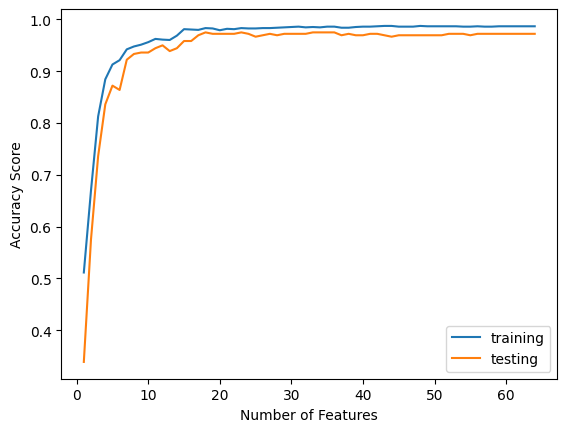

In [24]:
plt.plot(range(1,65), best_train_acc, label = "training")
plt.plot(range(1,65), best_test_acc, label = "testing")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score")
plt.legend()

## __6 Model Training with Best Components__

In [25]:
refined_pca = PCA(n_components=23)

# with reduced feature names
new_pca_names = [f"PCA-{i}" for i in range(1, refined_pca.n_components+1)]
train_scaled_pca_final = pd.DataFrame(refined_pca.fit_transform(x_train), columns=new_pca_names)
train_scaled_pca_final.head()

,PCA-1,PCA-2,PCA-3,PCA-4,PCA-5,PCA-6,PCA-7,PCA-8,PCA-9,PCA-10,...,PCA-14,PCA-15,PCA-16,PCA-17,PCA-18,PCA-19,PCA-20,PCA-21,PCA-22,PCA-23
0,0.601369,1.595359,-3.347282,-0.114225,-0.119414,-0.620298,-0.052738,0.133956,-0.211219,-0.135214,...,-0.855525,-1.332435,1.057881,0.376416,0.056532,-0.310031,0.734289,0.315318,0.108296,0.663547
1,-0.579502,-4.896811,0.193435,-0.473536,1.917926,-0.716792,-1.068861,-2.474896,-0.009999,1.412795,...,-1.675390,-0.529710,1.317074,-0.911590,-1.167306,0.606739,0.407097,-0.426476,0.489009,0.432370
2,-2.060557,-4.625308,0.021216,-1.485033,-0.027755,0.085216,-0.036805,-1.677585,-0.399745,0.139814,...,-1.975412,0.935602,0.967668,0.059872,-0.151191,0.591688,-0.425058,-0.864313,-0.166776,0.363263
3,-0.490517,0.192537,-0.627835,-1.623770,1.035935,-1.806195,2.940193,0.100614,-0.530290,1.180126,...,-1.083639,1.562286,0.562721,0.913990,0.552425,-1.206998,-0.297368,-0.098180,-0.172983,0.202411
4,-0.955507,0.781939,-3.755356,1.855847,-1.153082,1.547576,-0.683681,0.665648,-0.387187,0.170831,...,-0.252611,-1.211545,-0.971384,0.192229,-0.199230,0.707420,-0.236790,0.810241,-0.210925,-1.390891


In [26]:
knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(train_scaled_pca_final, y_train)

KNeighborsClassifier()

- _Training Accuracy_

In [27]:
train_acc_final = knn_final.score(train_scaled_pca_final, y_train)
train_acc_final

0.9832985386221295

- _Testing PCA | Transforming test data_

In [28]:
test_scaled_pca_final = pd.DataFrame(refined_pca.transform(x_test), columns=new_pca_names)

- _Testing Accuracy_

In [29]:
test_acc_final = knn_final.score(test_scaled_pca_final, y_test)
test_acc_final

0.975

In [30]:
data = {
    "Type": ["No PCA", "With PCA", "Adjusted PCA"],
    "Total Features": [knn_model.n_features_in_, knn_model_pca.n_features_in_, knn_final.n_features_in_],
    "Training Accuracy": [train_acc, train_acc_pca, train_acc_final],
    "Testing Accuracy": [test_acc, test_acc_pca, test_acc_final]
}

pd.DataFrame(data)

,Type,Total Features,Training Accuracy,Testing Accuracy
0,No PCA,64,0.986778,0.972222
1,With PCA,64,0.986778,0.972222
2,Adjusted PCA,23,0.983299,0.975000


# __7. User Testing__

- _user input with all feartures_

In [31]:
scaled_user_input = scaler.transform(x[43:44])
scaled_user_input

array([[ 0.        , -0.33501649, -1.09493684, -0.66762355,  0.7353655 ,
         1.09767273, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        -1.17755836, -1.25222949, -0.68586377,  0.96246672, -0.51499146,
        -0.13043338, -0.04462507, -0.72764628, -1.74070185, -1.20543167,
        -1.14964846,  0.83828176,  0.37173289, -0.11422184, -0.03337973,
         0.48648928, -0.0147429 , -0.13965773,  0.01185281,  0.92805285,
        -0.35755713, -0.04723238,  0.        ,  0.47724997,  1.31786694,
         0.94599454,  0.96064411,  1.23632049,  0.8739949 ,  0.        ,
        -0.06134367, -0.5312841 , -1.05283456, -1.12245711,  1.01118593,
        -0.91966262, -0.79827225, -0.08874162, -0.03543326, -0.40357499,
        -1.33033057, -0.10319257,  0.48744743, -1.45261152, -0.75743581,
        -0.20978513, -0.02359646, -0.29908135, -1.08938309, -0.24900951,
        -0.9749729 , -1.14664746, -0.5056698 , -0.19600752]])

- _applying refined PCA on user input_

In [32]:
user_input = refined_pca.transform(scaled_user_input)
user_input

array([[-2.49017307,  2.55527964,  0.29792777,  0.56867767, -0.94863715,
        -1.62988198, -0.50460072, -0.31660574,  0.08174355,  1.36773213,
        -1.95197701,  1.31968182,  0.15276437, -0.30146672, -0.01684516,
         0.5420584 ,  0.96270375,  0.29346823, -0.86583164, -0.09468201,
        -0.028375  ,  0.43606643, -0.34946143]])

- _Predicting result on user input_

In [33]:
knn_final.predict(user_input)

array([7])